# Week 08: The Constant

As a rule, the constant term is always included in the set of regressors X ...

https://en.wikipedia.org/wiki/Ordinary_least_squares

The intercept (often labeled the constant) is the expected mean value of y when all X=0.

https://www.theanalysisfactor.com/interpreting-the-intercept-in-a-regression-model/

You should include the constant in your regression model. It guarantees that your residuals have a mean of zero. Additionally, if you don’t include the constant, the regression line is forced to go through the origin. This means that all of the predictors and the response variable must equal zero at that point. If your fitted line doesn’t naturally go through the origin, your regression coefficients and predictions will be biased if you don't include the constant.

https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-to-interpret-the-constant-y-intercept

Not all algorithims need the constant.

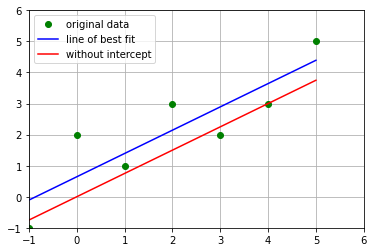

blue: y = 0.64 + 0.75(X)
red: y = 0.75(X)
LinregressResult(slope=0.7500000000000001, intercept=0.6428571428571426, rvalue=0.8689861830324864, pvalue=0.011106158065996423, stderr=0.19099631367315617, intercept_stderr=0.5402191543196866)


In [27]:
# using scipy
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.array([-1, 0, 1, 2, 3, 4, 5])
y = np.array([-1, 2, 1, 3, 2, 3, 5])

model = stats.linregress(x, y)

plt.plot(x, y, 'go', label='original data')
plt.plot(x, model.intercept + model.slope*x, 'b', label='line of best fit')
plt.plot(x, model.slope*x, 'r', label='without intercept')
plt.legend()
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.grid()
plt.show()

print(f'blue: y = {model.intercept:.2} + {model.slope:.2}(X)')
print(f'red: y = {model.slope:.2}(X)')
print(model)

## Interpretation

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

* slope
* intercept
* rvalue: The Pearson correlation coefficient. The square of rvalue is equal to the coefficient of determination
* pvalue: The p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic. See alternative below for alternative hypotheses
* stderr: Standard error of the estimated slope (gradient), under the assumption of residual normality
* intercept_stderr: Standard error of the estimated intercept, under the assumption of residual normality

**alternative**: {‘two-sided’, ‘less’, ‘greater’}, optional

Defines the alternative hypothesis. Default is ‘two-sided’. The following options are available:

* ‘two-sided’: the slope of the regression line is nonzero
* ‘less’: the slope of the regression line is less than zero
* ‘greater’: the slope of the regression line is greater than zero

### Coefficient of Determination

The coefficient of determination is a statistical measurement that examines how differences in one variable can be explained by the difference in a second variable, when predicting the outcome of a given event. In other words, this coefficient, which is more commonly known as R-squared, assesses how strong the linear relationship is between two variables, and is heavily relied on by researchers when conducting trend analysis.

https://www.investopedia.com/terms/c/coefficient-of-determination.asp

### Wald Test with t-distribution

The Wald test (also called the Wald Chi-Squared Test) is a way to find out if explanatory variables in a model are significant. “Significant” means that they add something to the model; variables that add nothing can be deleted without affecting the model in any meaningful way. The test can be used for a multitude of different models including those with binary variables or continuous variables.

Stephanie Glen. "Wald Test: Definition, Examples, Running the Test" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/wald-test/

### Standard Error of the Estimated Slope

Standard errors for regression are measures of how spread out your y variables are around the mean, μ.The standard error of the regression slope, s (also called the standard error of estimate) represents the average distance that your observed values deviate from the regression line. The smaller the “s” value, the closer your values are to the regression line.

https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-standard-error-regression-slope/

### Standard Error of the Estimated Intercept (under the assumption of residual normality)

The standard error of the the intercept allows you to test whether or not the estimated intercept is statistically significant from a specified(hypothesized) value ...normally 0.0 . If you test against 0.0 and fail to reject then you can then re-estimate your model without the intercept term being present.

https://stats.stackexchange.com/questions/173271/what-exactly-is-the-standard-error-of-the-intercept-in-multiple-regression-analy

In [4]:
# create housing dataframe
import pandas as pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
print(dataset.keys())
print(dataset.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [5]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['class'] = dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# looking at the model without constant
import statsmodels.api as sm

model = sm.OLS(df['class'], df.drop('class', axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  class   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              177.6
Date:                Fri, 21 Oct 2022   Prob (F-statistic):                   1.78e-257
Time:                        09:17:26   Log-Likelihood:                          4.4418
No. Observations:                 569   AIC:                                      51.12
Df Residuals:                     539   BIC:                                      181.4
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
mean radius                 0.4200      0.179      2.350      0.019       0.069       0.771
mean texture               -0.0026      0.008     -0.316      0.752      -0.019       0.014
mean perimeter             -0.0239      0.026     -0.912      0.362      -0.075       0.028
mean area                  -0.0019      0.000     -3.718      0.000      -0.003      -0.001
mean smoothness            -0.3506      2.106     -0.166      0.868      -4.488       3.787
mean compactness            0.1224      1.254      0.098      0.922      -2.341       2.585
mean concavity             -0.8504      1.089     -0.781      0.435      -2.990       1.289
mean concave points        -3.4663      2.058     -1.685      0.093      -7.508       0.576
mean symmetry               0.7007      0.767      0.914      0.361      -0.805       2.206
mean fractal dimension     27.8416      4.107      6.780      0.000      19.775      35.908
radius error               -0.3763      0.324     -1.161      0.246      -1.013       0.260
texture error              -0.0021      0.038     -0.055      0.956      -0.078       0.073
perimeter error             0.0071      0.043      0.167      0.868      -0.077       0.091
area error                  0.0021      0.001      1.477      0.140      -0.001       0.005
smoothness error          -13.8783      6.912     -2.008      0.045     -27.457      -0.300
compactness error           2.7795      2.226      1.249      0.212      -1.594       7.153
concavity error             3.4876      1.358      2.568      0.011       0.819       6.156
concave points error      -10.8563      5.694     -1.907      0.057     -22.041       0.328
symmetry error             -1.3005      2.848     -0.457      0.648      -6.895       4.294
fractal dimension error   -15.3194     11.732     -1.306      0.192     -38.366       7.728
worst radius               -0.2527      0.060     -4.215      0.000      -0.370      -0.135
worst texture              -0.0059      0.007     -0.808      0.420      -0.020       0.008
worst perimeter             0.0069      0.006      1.118      0.264      -0.005       0.019
worst area                  0.0012      0.000      3.550      0.000       0.001       0.002
worst smoothness            0.3727      1.492      0.250      0.803      -2.558       3.304
worst compactness           0.1490      0.399      0.374      0.709      -0.634       0.932
worst concavity            -0.4669      0.280     -1.666      0.096      -1.017       0.084
worst concave points       -0.5766      0.955     -0.604      0.546      -2.452       1.299
worst symmetry             -0.6782      0.516     -1.314      0.189      -1.692       0.335
worst fractal dimension    -5.8561      

In [7]:
# looking at the model with constant
import statsmodels.api as sm

df.insert(0, 'const', 1)
model = sm.OLS(df['class'], df.drop('class', axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  class   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Fri, 21 Oct 2022   Prob (F-statistic):          6.05e-153
Time:                        09:18:27   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.0218      0.428      7.060      0.000       2.181       3.863
mean radius                 0.2178      0.174      1.255      0.210      -0.123       0.559
mean texture               -0.0045      0.008     -0.572      0.567      -0.020       0.011
mean perimeter             -0.0237      0.025     -0.946      0.345      -0.073       0.026
mean area                  -0.0003      0.001     -0.605      0.545      -0.001       0.001
mean smoothness            -0.0847      2.017     -0.042      0.967      -4.047       3.878
mean compactness            4.2220      1.334      3.166      0.002       1.602       6.842
mean concavity             -1.3980      1.046     -1.337      0.182      -3.452       0.656
mean concave points        -2.1418      1.979     -1.082      0.280      -6.030       1.746
mean symmetry              -0.1027      0.743     -0.138      0.890      -1.562       1.356
mean fractal dimension     -0.0333      5.572     -0.006      0.995     -10.979      10.913
radius error               -0.4350      0.310     -1.401      0.162      -1.045       0.175
texture error               0.0068      0.037      0.183      0.855      -0.066       0.079
perimeter error             0.0225      0.041      0.548      0.584      -0.058       0.103
area error                  0.0009      0.001      0.660      0.509      -0.002       0.004
smoothness error          -15.8543      6.625     -2.393      0.017     -28.868      -2.841
compactness error          -0.0649      2.169     -0.030      0.976      -4.327       4.197
concavity error             3.5655      1.301      2.741      0.006       1.010       6.121
concave points error      -10.5680      5.452     -1.938      0.053     -21.278       0.142
symmetry error             -1.6973      2.728     -0.622      0.534      -7.055       3.661
fractal dimension error     7.1464     11.676      0.612      0.541     -15.791      30.083
worst radius               -0.1952      0.058     -3.367      0.001      -0.309      -0.081
worst texture              -0.0072      0.007     -1.030      0.303      -0.021       0.006
worst perimeter             0.0024      0.006      0.410      0.682      -0.009       0.014
worst area                  0.0010      0.000      3.163      0.002       0.000       0.002
worst smoothness           -0.5429      1.435     -0.378      0.705      -3.361       2.275
worst compactness          -0.0672      0.383     -0.175      0.861      -0.820       0.685
worst concavity            -0.3812      0.269     -1.419      0.156      -0.909       0.146
worst concave points       -0.4643      0.914     -0.508      0.612      -2.260       1.332
worst symmetry             -0.5568      0.494     -1.126      0.260      -1.528       0.414
worst fractal dimension    -4.3035      2.383  

### Reading

* https://stats.stackexchange.com/questions/267325/why-does-statsmodels-api-ols-over-report-the-r-squared-value
* https://stats.stackexchange.com/questions/26176/removal-of-statistically-significant-intercept-term-increases-r2-in-linear-mo
* https://stats.stackexchange.com/questions/425622/does-over-fitting-a-model-affect-r-squared-only-or-adjusted-r-squared-too